In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/df_pca_general_3_clusters.csv")
df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_63,PCA_64,PCA_65,PCA_66,PCA_67,PCA_68,PCA_69,PCA_70,Variable_objetivo,Cluster
0,-2.658543,-5.968461,0.231951,7.892412,4.153116,1.695499,-0.649449,-4.341447,-0.975170,-1.688808,...,-0.880154,0.587800,-0.866454,1.051494,-0.599151,1.328095,-3.243144,0.376839,1,2
1,-2.590676,-5.937386,0.248311,7.411845,4.211555,0.818991,-0.117905,-4.620935,0.174734,-0.470983,...,-0.030040,-0.113300,0.956202,-0.560775,0.151309,0.108843,0.000435,1.261450,1,2
2,-2.135377,-6.289446,0.213898,7.576798,3.918421,2.003072,-0.747290,-3.396869,-2.314333,-2.064491,...,-0.233352,-0.445675,0.777352,-0.103923,-0.134453,-0.340532,-0.316837,0.832557,1,2
3,-1.212757,-6.602966,0.237742,7.495102,3.933036,1.295301,-0.393547,-4.409749,-1.121029,-0.369048,...,-0.408606,-0.054751,1.227692,1.955058,2.975982,-2.589772,-0.192460,-1.757941,0,2
4,-2.403445,-7.034885,0.218804,7.757106,3.782565,1.816631,-0.600110,-3.916189,-1.449555,-1.772607,...,-0.874185,0.000477,0.051485,0.548440,0.590822,0.877269,0.034263,0.109223,0,2


In [ ]:
df.value_counts(df['Cluster'])

,count
Cluster,
0,135312
2,118983
1,18560


Distribución de clases:
 Cluster
0    135312
2    118983
1     18560
Name: count, dtype: int64


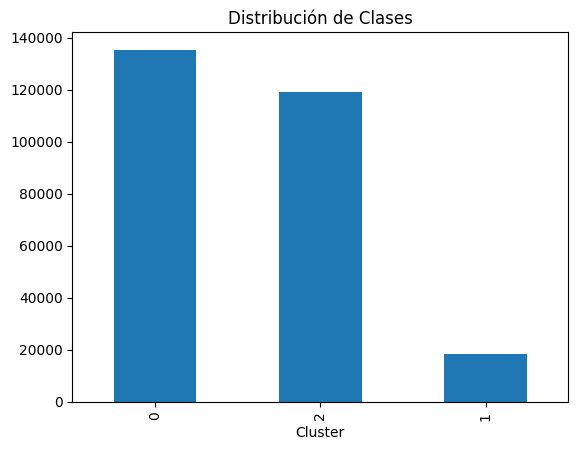

In [ ]:
y = df['Cluster']
counts = y.value_counts()
print("Distribución de clases:\n", counts)
counts.plot(kind='bar', title='Distribución de Clases')
plt.show()

In [ ]:
model_imported = joblib.load('/content/random_forest_model.pkl')

## Train-test split

In [ ]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [ ]:
model_imported.predict(np.array(X.iloc[0]).reshape(1,-1))

array([2])

Usamos el parámetro stratify para que se mantenga la proporción de clases en el conjunto de prueba como en el de entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Balenceo de clases

Esto combina el método SMOTE para generar datos sintéticos para las clases minoritarias con el método de undersampling aleatorio para las clases mayoritarias.

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

Distribución de clases:
 Cluster
1    108245
2    107040
0    107039
Name: count, dtype: int64


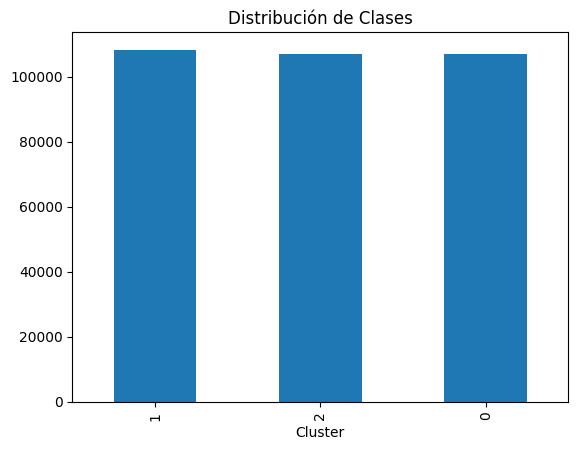

In [ ]:
counts_bal = y_train_res.value_counts()
print("Distribución de clases:\n", counts_bal)
counts_bal.plot(kind='bar', title='Distribución de Clases')
plt.show()

## Modelo RandomForest con clases balanceadas

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)

## 5-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='f1_weighted')
print("F1-score promedio:", scores.mean())

F1-score promedio: 0.9951002657169059


## Métricas de evaluación

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[26834   115   113]
 [   13  3689    10]
 [  108    89 23600]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     27062
           1       0.95      0.99      0.97      3712
           2       0.99      0.99      0.99     23797

    accuracy                           0.99     54571
   macro avg       0.98      0.99      0.99     54571
weighted avg       0.99      0.99      0.99     54571



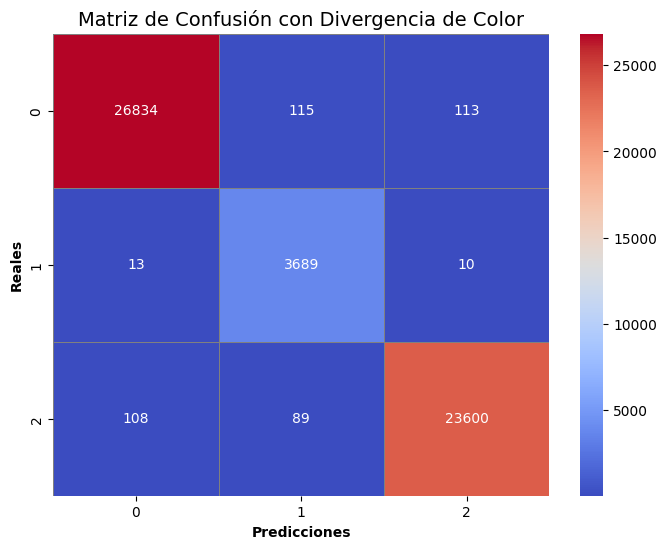

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            center=cm.max()/2, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Confusión con Divergencia de Color', fontsize=14)
plt.xlabel('Predicciones', fontweight='bold')
plt.ylabel('Reales', fontweight='bold')
plt.show()

## Modelo exportado

In [ ]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

## Tuning SVM

In [ ]:
X_pca = df.drop(["Cluster", "Variable_objetivo"], axis = 1)
y_pca = df['Variable_objetivo']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, stratify=y_pca, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 1. Definir el modelo base
svm_model = SVC(random_state=1234, probability=True)

# 2. Espacio de hiperparámetros reducido
param_dist_svm = {
    'C': [0.1, 1, 10],                   # Menos opciones (valores clave)
    'kernel': ['linear', 'rbf'],          # Eliminamos 'poly' (más lento)
    'gamma': ['scale', 'auto', 0.1, 1],   # Valores comunes para RBF
    'class_weight': [None]                # Eliminamos 'balanced' (ya está balanceado)
}

# 3. Búsqueda aleatoria más rápida
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist_svm,
    n_iter=5,              # Reducir combinaciones (de 20 a 10)
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=1234
)

# 4. Entrenamiento (ahora será más rápido)
random_search_svm.fit(X_train_pca, y_train_pca)

# 5. Evaluación (igual que antes)
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_pca)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy (SVM optimizado): {accuracy_svm:.4f}")
print(f"Mejores hiperparámetros: {random_search_svm.best_params_}\n")

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
